В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [130]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.base import ClassifierMixin
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
%matplotlib inline

In [158]:
%reload_ext autoreload
%autoreload 2

from process_bank_churn import process_data

data = process_data('/content/train.csv', target_col = 'Exited')

X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

data

{'train_X':        CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 id                                                                      
 7180         682.0  30.0     1.0  131394.56            1.0        1.0   
 10393        684.0  39.0     2.0  178058.06            1.0        1.0   
 80           705.0  35.0     6.0  116320.68            2.0        1.0   
 3365         669.0  58.0     0.0       0.00            2.0        0.0   
 12236        707.0  21.0     3.0       0.00            2.0        1.0   
 ...            ...   ...     ...        ...            ...        ...   
 9493         633.0  33.0     4.0       0.00            2.0        0.0   
 8463         673.0  40.0     1.0       0.00            1.0        1.0   
 8143         621.0  29.0     8.0       0.00            2.0        1.0   
 11512        590.0  42.0     7.0       0.00            2.0        0.0   
 9360         545.0  27.0     2.0       0.00            2.0        1.0   
 
        IsActiveMember  E

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [163]:
# 1
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [164]:
# 2

def evaluate_model(model: ClassifierMixin, X_train: pd.DataFrame, y_train: np.ndarray,
                   X_val: pd.DataFrame, y_val: np.ndarray) -> None:
    """
    Обчислює та виводить AUC-ROC для тренувального та валідаційного наборів.

    :param model: Навчена модель (класифікатор).
    :param X_train: pd.DataFrame, тренувальні ознаки.
    :param y_train: np.ndarray, мітки для тренувального набору.
    :param X_val: pd.DataFrame, валідаційні ознаки.
    :param y_val: np.ndarray, мітки для валідаційного набору.
    """
    # Отримання ймовірностей для позитивного класу
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    # Обчислення AUC-ROC
    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_auc = roc_auc_score(y_val, y_val_pred_proba)

    # Вивід результатів
    print(f"Train AUC-ROC: {train_auc:.4f}")
    print(f"Validation AUC-ROC: {val_auc:.4f}")

    # Аналіз перенавчання або недонавчання
    if train_auc > val_auc + 0.1:
        print("Є ознаки перенавчання (overfitting).")
    elif val_auc > train_auc + 0.1:
        print("Є ознаки недонавчання (underfitting).")
    else:
        print("Модель збалансована.")


evaluate_model(model, X_train, train_targets, X_val, val_targets)

Train AUC-ROC: 1.0000
Validation AUC-ROC: 0.7521
Є ознаки перенавчання (overfitting).


In [165]:
# 3
model.tree_.max_depth

26

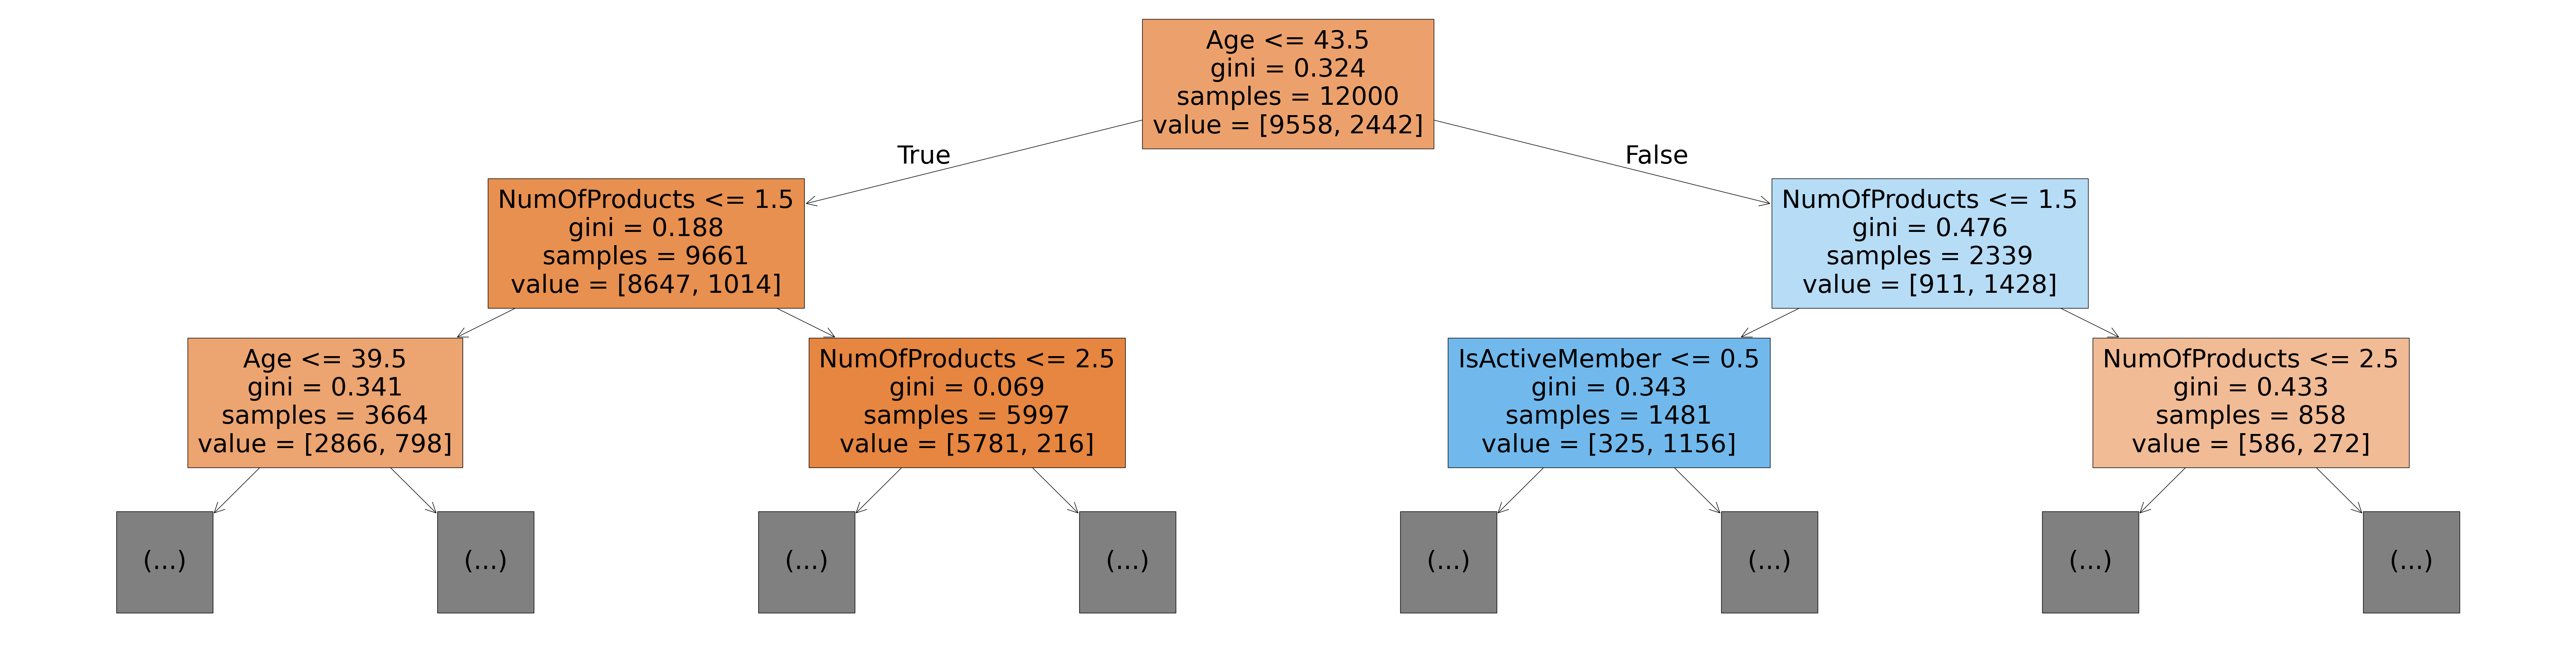

In [135]:
# 4
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

# Бачимо, що найбільш важливими ознаками є вік та кількість продуктів

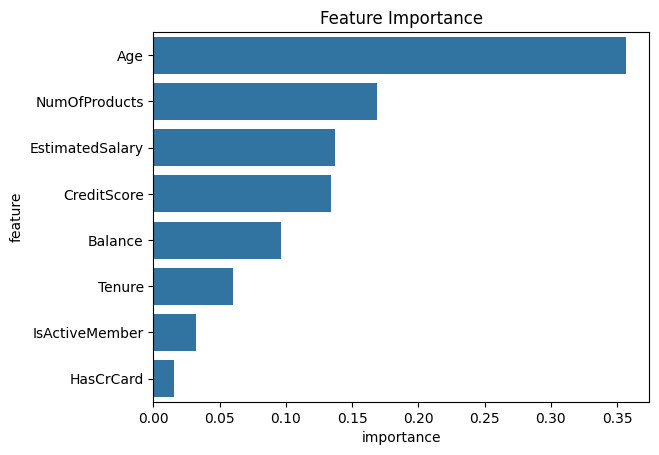

In [166]:
# 5
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [169]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)
evaluate_model(model, X_train, train_targets, X_val, val_targets)

model = DecisionTreeClassifier(max_leaf_nodes=60, random_state=42)
model.fit(X_train, train_targets)
evaluate_model(model, X_train, train_targets, X_val, val_targets)

Train AUC-ROC: 0.9206
Validation AUC-ROC: 0.9151
Модель збалансована.
Train AUC-ROC: 0.9241
Validation AUC-ROC: 0.9124
Модель збалансована.


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

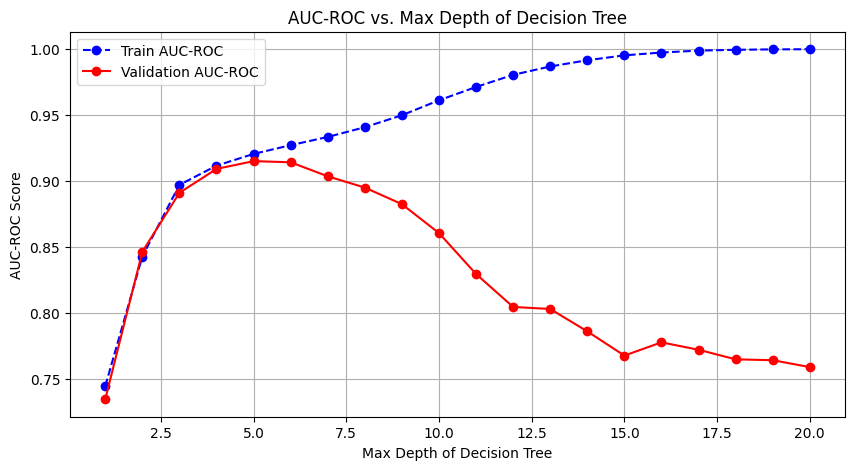

In [138]:
def tune_decision_tree(X_train: np.ndarray, y_train: np.ndarray,
                       X_val: np.ndarray, y_val: np.ndarray) -> None:
    """
    Тренує `DecisionTreeClassifier` для різних значень `max_depth` і будує графік AUC-ROC для тренувальних
    та валідаційних даних залежно від глибини дерева.

    :param X_train: np.ndarray, ознаки тренувального набору.
    :param y_train: np.ndarray, мітки тренувального набору.
    :param X_val: np.ndarray, ознаки валідаційного набору.
    :param y_val: np.ndarray, мітки валідаційного набору.
    """
    train_aucs = []
    val_aucs = []
    depths = list(range(1, 21))

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        # Отримання ймовірностей для позитивного класу
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]

        # Обчислення AUC-ROC
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
        val_auc = roc_auc_score(y_val, y_val_pred_proba)

        train_aucs.append(train_auc)
        val_aucs.append(val_auc)

    # Побудова графіка
    plt.figure(figsize=(10, 5))
    plt.plot(depths, train_aucs, label="Train AUC-ROC", marker='o', linestyle='--', color='blue')
    plt.plot(depths, val_aucs, label="Validation AUC-ROC", marker='o', linestyle='-', color='red')

    plt.xlabel("Max Depth of Decision Tree")
    plt.ylabel("AUC-ROC Score")
    plt.title("AUC-ROC vs. Max Depth of Decision Tree")
    plt.legend()
    plt.grid(True)
    plt.show()

tune_decision_tree(X_train, train_targets, X_val, val_targets)


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [160]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)
evaluate_model(model, X_train, train_targets, X_val, val_targets)

test_inputs = process_data('/content/test.csv')
probs = model.predict_proba(test_inputs['X'])[:,1]

submission = pd.read_csv('sample_submission.csv')
submission['Exited'] = probs
submission.to_csv('submission_tree.csv', index=False)
submission['Exited'].head()

Train AUC-ROC: 0.9206
Validation AUC-ROC: 0.9151
Модель збалансована.


,Exited
0,0.075452
1,0.027613
2,0.027613
3,0.770925
4,0.027613
